# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

1. Load the `./data/college_completion.csv` data with Pandas.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("data/college_completion.csv")
df = pd.DataFrame(df)
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [41]:
print("Dimensions of the data:", df.shape)
print("Number of observations:", df.shape[0])
print("Included Variables:", df.columns.tolist())


Dimensions of the data: (3798, 63)
Number of observations: 3798
Included Variables: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after

3. Cross tabulate `control` and `level`. Describe the patterns you see.

In [42]:
cross_tab = pd.crosstab(df["control"], df["level"])
cross_tab

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Private** institutions tend to focus on 4-year programs whereas **Public** institutions tend to focus on 2-year programs. **Private non-profit** institutions have a vast majority persuing 4-year programs, 1180 to 68. However, **Private for-profit** insitutions were pretty much split between 2-year and 4-year programs, 465 to 527.

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

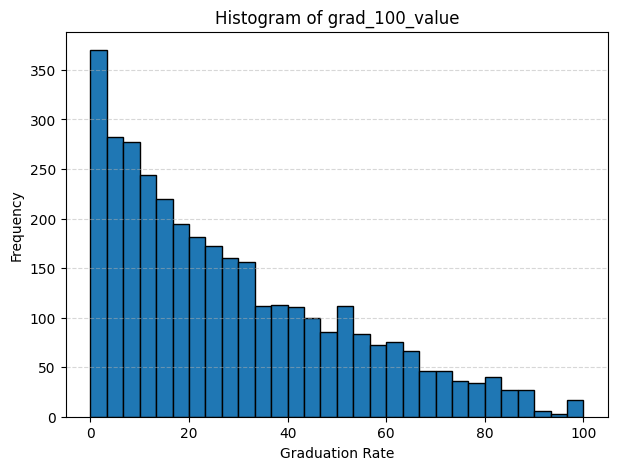

In [43]:
plt.figure(figsize=(7, 5))
plt.hist(df["grad_100_value"], bins=30, edgecolor = "black")
plt.title("Histogram of grad_100_value")
plt.xlabel("Graduation Rate")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha = 0.5)
plt.show()

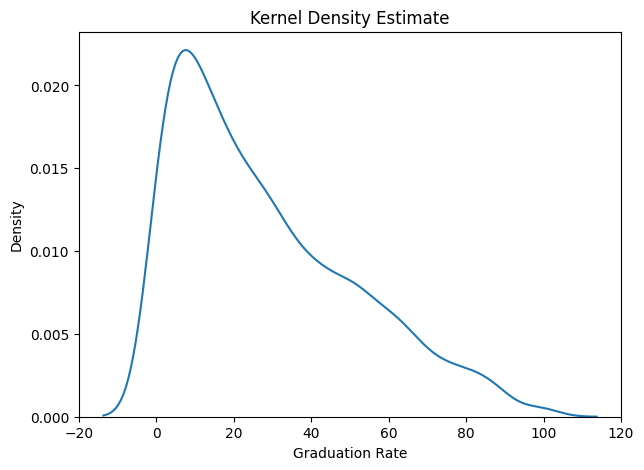

In [44]:
plt.figure(figsize=(7, 5))
sns.kdeplot(df["grad_100_value"])
plt.title("Kernel Density Estimate")
plt.xlabel("Graduation Rate")
plt.ylabel("Density")
plt.show()

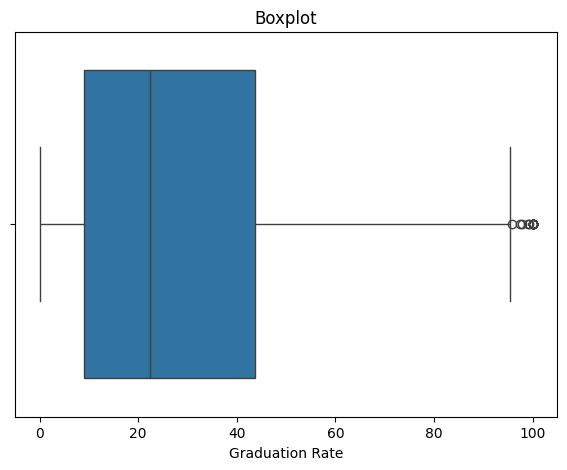

In [45]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df["grad_100_value"])
plt.title("Boxplot")
plt.xlabel("Graduation Rate")
plt.show()


In [46]:
print(df["grad_100_value"].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

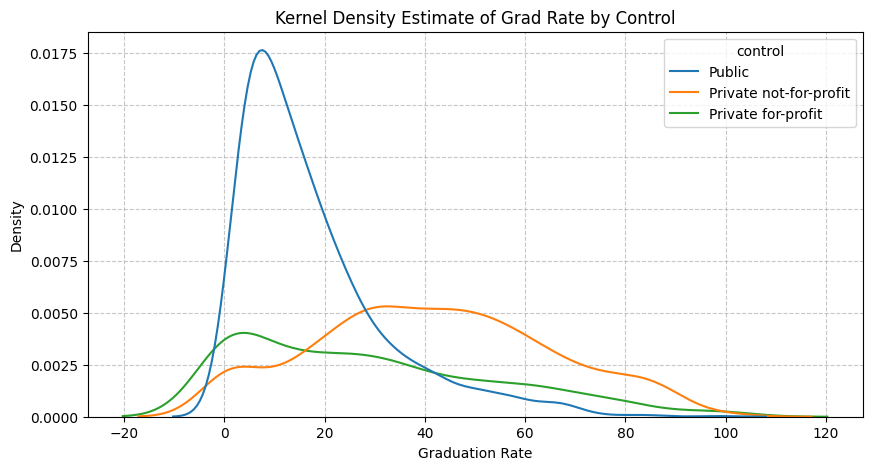

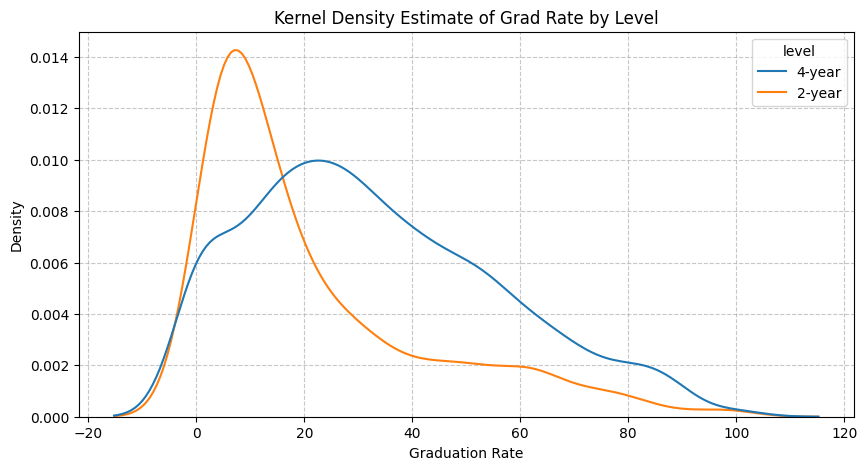

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [50]:
# Grouped KDE plot by 'control'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="grad_100_value", hue="control")
plt.title("Kernel Density Estimate of Grad Rate by Control")
plt.xlabel("Graduation Rate")
plt.ylabel("Density")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

# Grouped KDE plot by 'level'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="grad_100_value", hue="level")
plt.title("Kernel Density Estimate of Grad Rate by Level")
plt.xlabel("Graduation Rate")
plt.ylabel("Density")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

print(df.groupby("control")["grad_100_value"].describe())

print(df.groupby("level")["grad_100_value"].describe())

Looking at the first graph, the density of graduation rates for **Public** and **Private for-profit** institutions peaks much earlier than that of **Private not-for-profit** institutions, indicating that students at these schools are more likely to drop out. However, the peak for **Public** institutions is significantly higher than that of **Private** institutions, suggesting that a larger proportion of students at **Public** schools do not graduate.
Looking at the second graph, the peak for **2-year** programs is before that of **4-year** programs showing that people persuing shorter programs may not feel the need to complete their degree. Additionally, those persuing 2-year programs are more likely to be from **Public** institutions (vast proportion of 2-year program students were in Public institutions) which could imply why the density of the peak is far higher than that of the **4-year** programs considering **Public** institution graduation rate was far lower than **Private**.

**Private** institutions have higher graduation rates as the density is spread toward higher values. However, **Private for-profit** institutions have higher graduation rates than their other private counterparts as the mean graduation rate is far above the other. **Public** institutions show a large concetration of values at low graduation rates and have a much lower mean graduation rate.

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

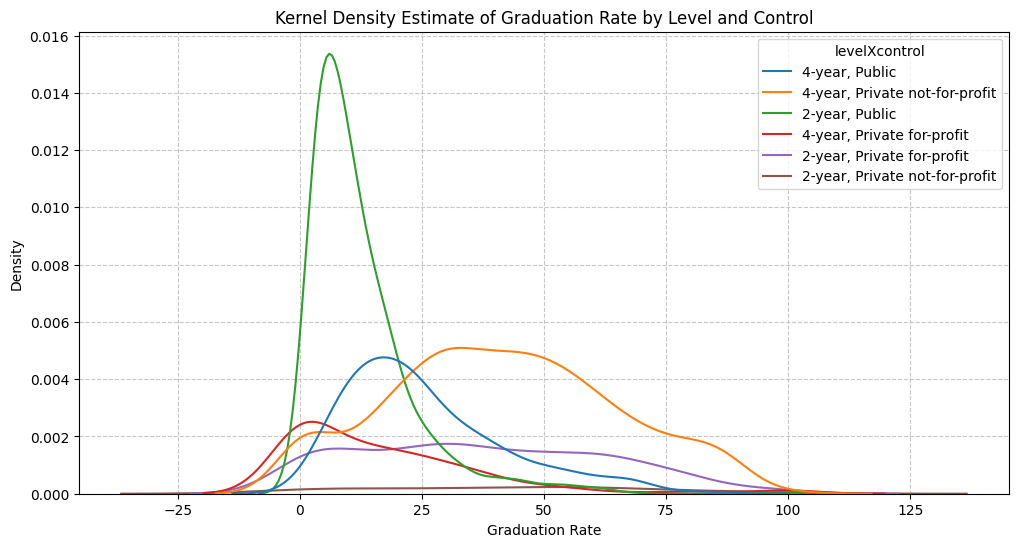

In [54]:
df['levelXcontrol']=df['level']+', '+df['control']
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="grad_100_value", hue="levelXcontrol")
plt.title("Kernel Density Estimate of Graduation Rate by Level and Control")
plt.xlabel("Graduation Rate")
plt.ylabel("Density")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

**Private not-for-profit** appear to have the highest graduation rates.

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

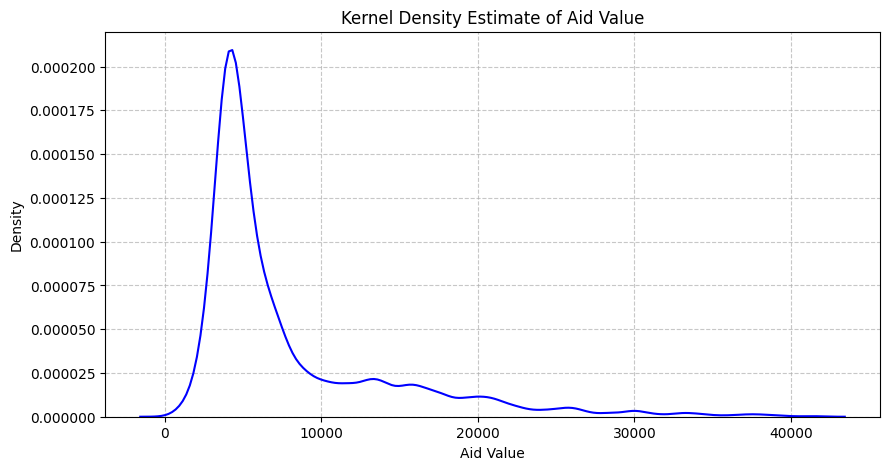

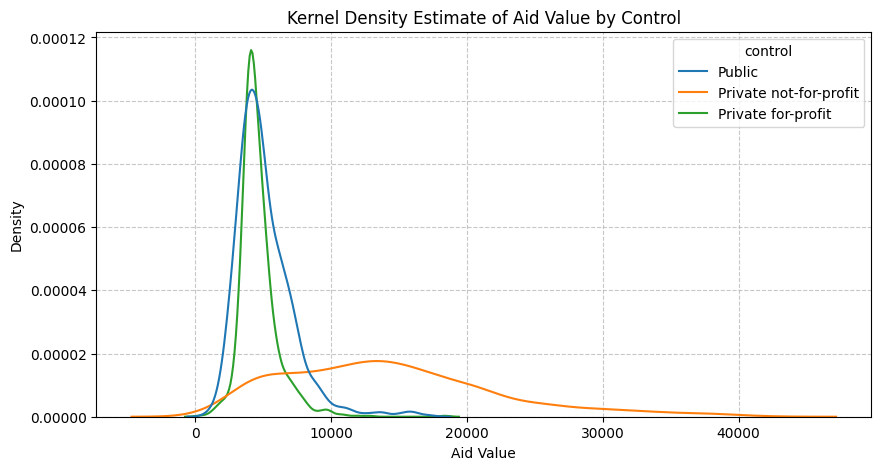

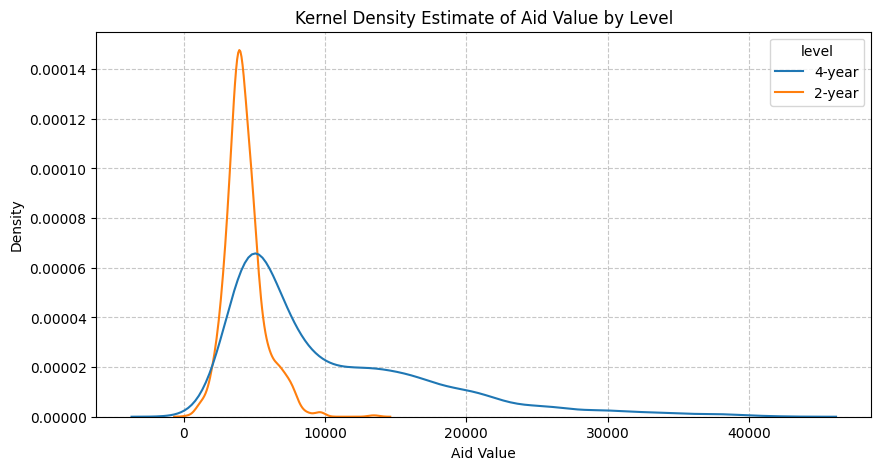

                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  1

In [56]:
# Kernel Density Estimate (KDE) plot for 'aid_value'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="aid_value", bw_adjust=0.5, color="blue")
plt.title("Kernel Density Estimate of Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

# Grouped KDE plot by 'control'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="aid_value", hue="control")
plt.title("Kernel Density Estimate of Aid Value by Control")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

# Grouped KDE plot by 'level'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="aid_value", hue="level")
plt.title("Kernel Density Estimate of Aid Value by Level")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

print(df.groupby("control")["aid_value"].describe())
print(df.groupby("level")["aid_value"].describe())


8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

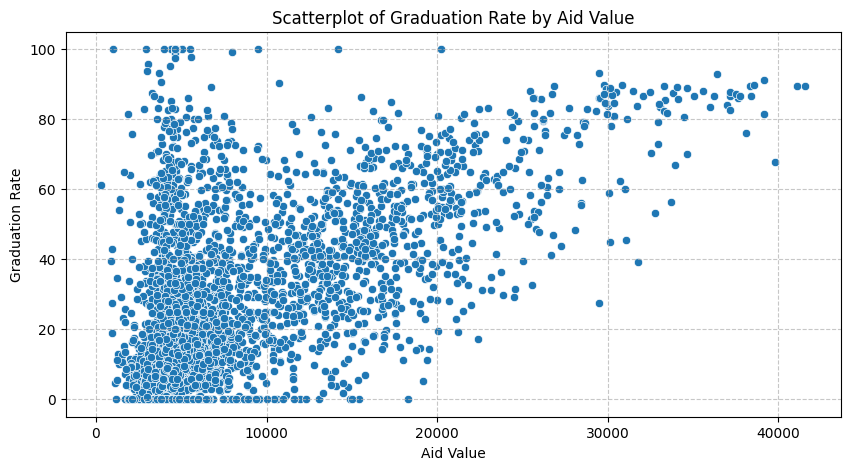

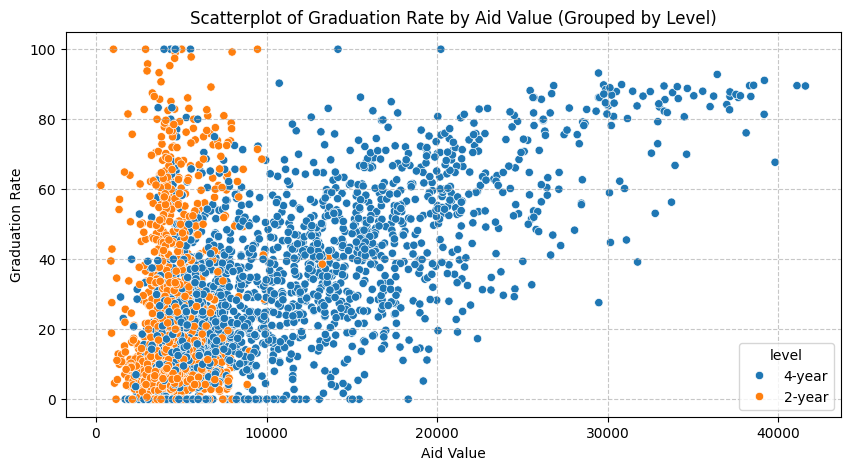

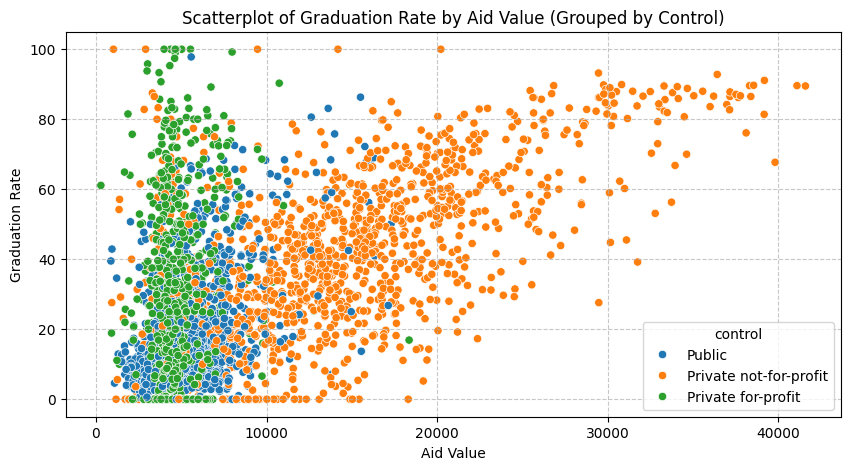

In [58]:
# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value")
plt.title("Scatterplot of Graduation Rate by Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

# Scatterplot grouped by 'level'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="level")
plt.title("Scatterplot of Graduation Rate by Aid Value (Grouped by Level)")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

# Scatterplot grouped by 'control'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control")
plt.title("Scatterplot of Graduation Rate by Aid Value (Grouped by Control)")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.grid(linestyle="--", alpha=0.7)
plt.show()


**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.